<div>
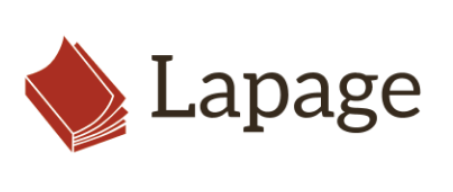
</div>


# Analyse du chiffre d'affaires

### Sommaire

* [Les clients](#chapter1)
* [Sexe](#chapter2)
* [Répartition du CA par âge](#chapter3)
* [Catégories de produits](#chapter4)
* [Evolution du CA](#chapter5)
* [Baisse du mois d'octobre](#chapter6)
* [Les articles](#chapter7)
* [Top et flop](#chapter8)
* [Panier moyen](#chapter9)
* [Les sessions](#chapter10)   

In [1]:
# Ouverture des librairies
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Ouverture de ma dataframe 
df = pd.read_csv('df_p6_final.csv', index_col = 0)

In [3]:
# Calcul du CA total
print("Le chiffre d'affaires total est de : {:,.1f} euros.".format(df.price.sum()).replace(',', ' '))

Le chiffre d'affaires total est de : 11 856 077.9 euros.


In [4]:
# Calcul du CA par année
df.groupby('année')['price'].sum()

année
2021    4.771751e+06
2022    6.109957e+06
2023    9.743691e+05
Name: price, dtype: float64

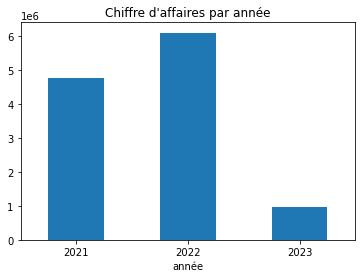

In [5]:
df.groupby('année')['price'].sum().plot(kind = 'bar')
plt.title('Chiffre d\'affaires par année')
plt.xticks(rotation=0, ha='center')
plt.show()

## Les clients<a class="anchor" id="chapter1"></a>

In [6]:
# Je compte le nombre de clients uniques
df.client_id.value_counts().shape

(8600,)

In [7]:
# Je regroupe mes données par client_id et j'affiche le montant de leurs achats.
df_client = df.groupby('client_id')[['price']].sum();
df_client.head()

,price
client_id,
c_1,558.18
c_10,1353.60
c_100,254.85
c_1000,2261.89
c_1001,1812.86


In [8]:
# Je tri les données de la colonne price par ordre croissant
df_client.sort_values('price', ascending = False)

,price
client_id,
c_1609,324033.35
c_4958,289760.34
c_6714,153662.70
c_3454,113669.82
c_3263,5276.87
...,...
c_4648,11.20
c_240,11.06
c_8114,9.98


On remarque que les 4 derniers clients ont dépensé beaucoup plus que les autres clients.

In [9]:
# Je crée une nouvelle dataframe qui contient toutes les données des 4 clients
df_4_clients = df.loc[(df['client_id']=='c_1609')| (df['client_id']=='c_4958')| (df['client_id']=='c_6714') | (df['client_id']=='c_3454'),:]

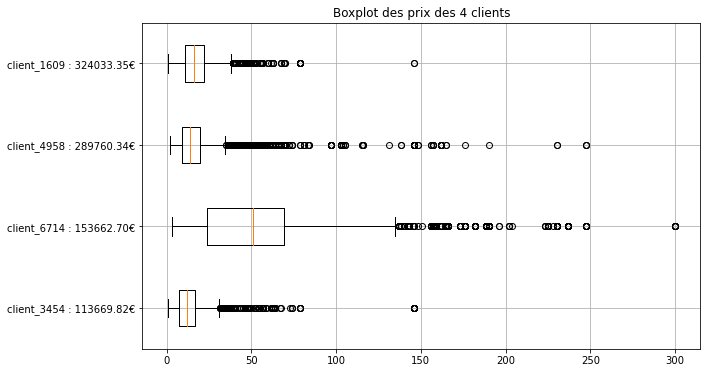

In [93]:
client_1609 = df_4_clients.loc[df_4_clients['client_id']=='c_1609']['price']
client_4958 = df_4_clients.loc[df_4_clients['client_id']=='c_4958']['price']
client_6714 = df_4_clients.loc[df_4_clients['client_id']=='c_6714']['price']
client_3454 = df_4_clients.loc[df_4_clients['client_id']=='c_3454']['price']
columns = [client_1609, client_4958,client_6714,client_3454]
fig, ax = plt.subplots(1,figsize=(10,6))
ax.boxplot(columns,vert=False, showfliers=True)
plt.yticks([1,2, 3, 4], ["client_3454 : 113669.82€", "client_6714 : 153662.70€", "client_4958 : 289760.34€" ,"client_1609 : 324033.35€"])
plt.title('Boxplot des prix des 4 clients')
plt.grid()
plt.show()

In [11]:
# Calcul du CA généré par ces 4 clients 
ca_4 = df_4_clients.price.sum()
print(ca_4)

881126.2100000001


In [12]:
prop_4_clients = df_4_clients.price.sum() /df.price.sum()*100;
print(prop_4_clients)

7.431852394094129


In [13]:
df_4_clients_categ = pd.pivot_table(df_4_clients, index = ['année','mois'], columns = 'categ', values = 'price',aggfunc={'price':'sum'});

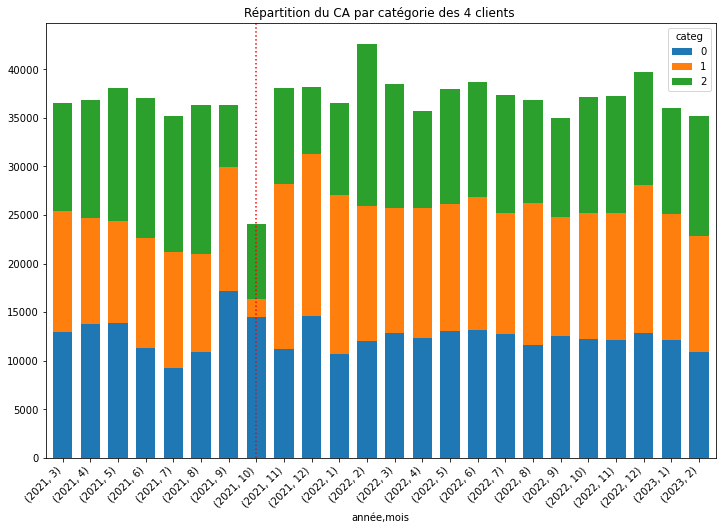

In [14]:
df_4_clients_categ.plot(kind='bar',stacked = True,figsize=(12,8),width = 0.7)
plt.title('Répartition du CA par catégorie des 4 clients ')
plt.axvline(7,color='red',linestyle=':')
plt.xticks(rotation = 45,ha='right')
plt.show()

In [15]:
# Je crée une dataframe par client
client_1609 = df_4_clients.loc[df_4_clients['client_id']=='c_1609',:]
client_4958 = df_4_clients.loc[df_4_clients['client_id']=='c_4958',:]
client_6714 = df_4_clients.loc[df_4_clients['client_id']=='c_6714',:]
client_3454 = df_4_clients.loc[df_4_clients['client_id']=='c_3454',:]

In [16]:
# J'effectue un pivot en prenant comme index l'anéne et le mois, j'affiche les catégories de produits et le CA par catégorie
client_1609_categ = pd.pivot_table(client_1609, index = ['année','mois'], columns = 'categ', values = 'price',aggfunc={'price':'sum'});
client_4958_categ = pd.pivot_table(client_4958, index = ['année','mois'], columns = 'categ', values = 'price',aggfunc={'price':'sum'});
client_6714_categ = pd.pivot_table(client_6714, index = ['année','mois'], columns = 'categ', values = 'price',aggfunc={'price':'sum'});
client_3454_categ = pd.pivot_table(client_3454, index = ['année','mois'], columns = 'categ', values = 'price',aggfunc={'price':'sum'});

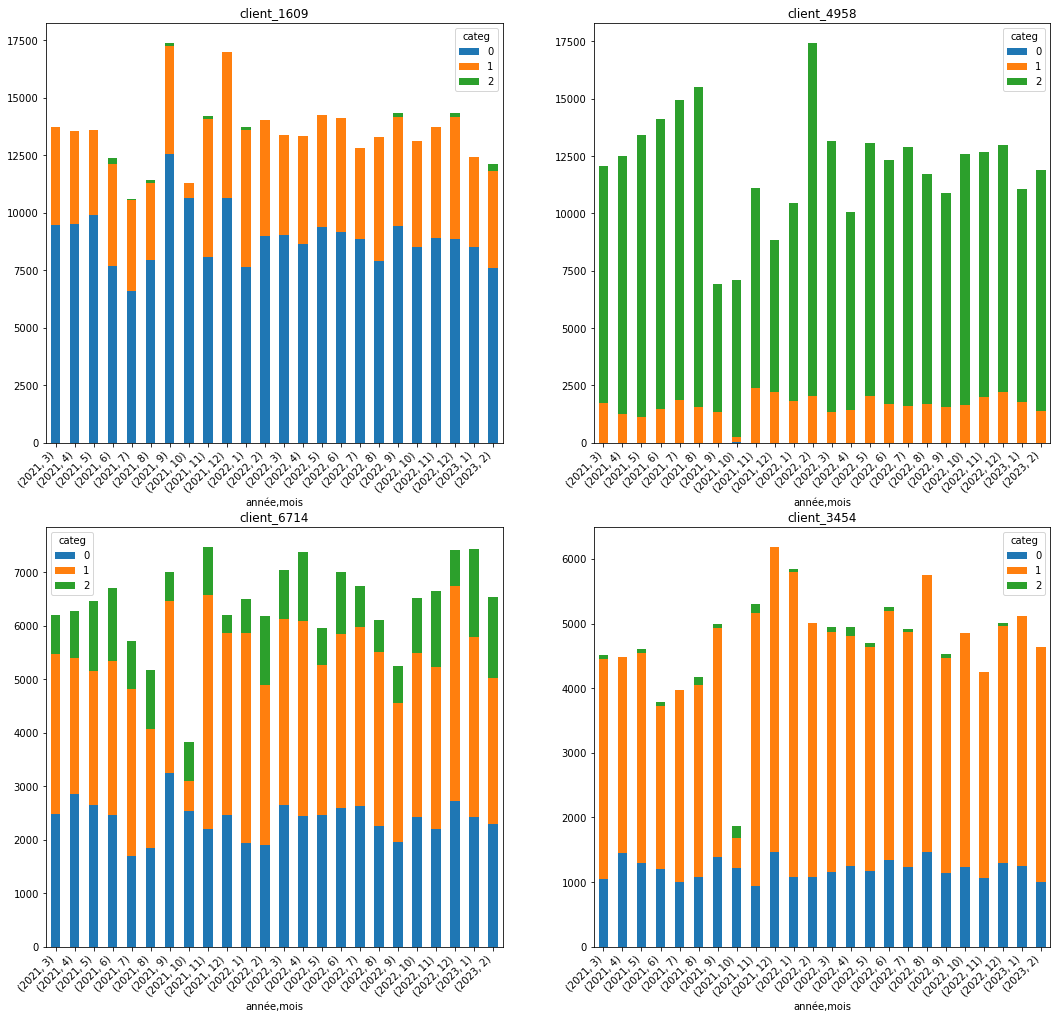

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(18, 17))

client_1609_categ.plot(kind= 'bar',stacked = True, ax=axes[0,0]); axes[0,0].set_title('client_1609'); 


client_4958_categ.plot(kind= 'bar',stacked = True, ax=axes[0,1]); axes[0,1].set_title('client_4958')


client_6714_categ.plot(kind= 'bar',stacked = True, ax=axes[1,0]); axes[1,0].set_title('client_6714')


client_3454_categ.plot(kind= 'bar',stacked = True, ax=axes[1,1]); axes[1,1].set_title('client_3454')

for ax in fig.axes:
    plt.sca(ax) # définit l’Axes courant à celui fourni par l’objet ax
    plt.xticks(rotation=45, ha ='right')
    
plt.show()

Création d'une courbe de Lorenz pour vérifier si la répartition du montant des commandes est égalitaire

In [18]:
cum = df_client.cumsum()

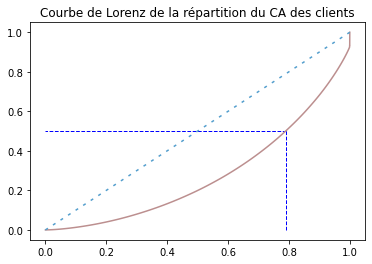

indice de gini: 0.45


In [19]:
dep = df_client['price']
n = len(cum)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

medial = lorenz[(lorenz < 0.5)].size / lorenz.size # Calcul de l'intersection

plt.plot(np.linspace(0,1,len(lorenz)), lorenz, drawstyle='steps-post', color='rosybrown', label='Lorenz')
plt.plot(np.linspace(0,1,len(lorenz)), np.linspace(0,1,len(lorenz)), dashes=[2,4], color='#539ecd')

plt.vlines(medial, ymin=0, ymax=.5, color='blue', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=medial, xmax=0, y=.5, color='blue', linestyle='--', linewidth=1)
plt.title('Courbe de Lorenz de la répartition du CA des clients')
plt.show()

aire_ss_courbe = lorenz[:-1].sum() / len(lorenz)
S = 0.5 - aire_ss_courbe
gini = 2*S
print(f'indice de gini: {gini:.2f}')

## Sexe<a class="anchor" id="chapter2"></a>

In [20]:
# Je crée 2 dataframes 'homme' et 'femme'
homme = df.loc[df['sex']=='m',:]
femme = df.loc[df['sex']=='f',:]

In [21]:
print(homme.sex.value_counts())
print(femme.sex.value_counts())

m    340930
Name: sex, dtype: int64
f    338402
Name: sex, dtype: int64


In [22]:
# Calcul du CA généré par les hommes
homme.price.sum()

5995151.07

In [23]:
# Calcul du CA généré par les femmes
femme.price.sum()

5860926.839999998

In [24]:
# Calcul de la proportion h/f
homme_prop = 340930 / 679332*100
femme_prop = 338402 / 679332*100

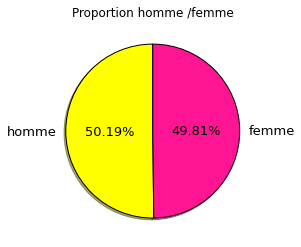

In [25]:
# création d'une liste comme arguments pour le graphique
portion = [homme_prop,femme_prop] 
# Paramétrage du graphique
plt.pie(portion,labels=['homme', 'femme'],
        colors = ['yellow','deeppink'],
        autopct='%.2f%%',pctdistance=0.5,
        shadow=True,startangle=90,
        wedgeprops={'linewidth': 1.0,'edgecolor':'black'},textprops={'fontsize': 13})
# Ajout du titre
plt.title("Proportion homme /femme")
# Affichage
plt.show()

Il n'y a pas de déséquilibre dans la proportion hommes / femmes.  
Je vérifie si le CA généré par ces deux groupes est équilibré.

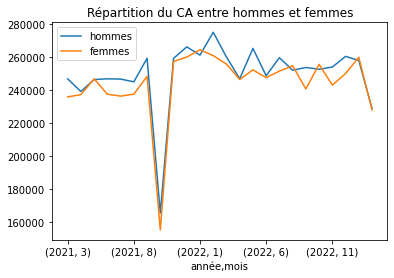

In [26]:
homme.groupby(['année','mois'])['price'].sum().plot()
femme.groupby(['année','mois'])['price'].sum().plot()
plt.legend(['hommes','femmes'])
plt.title('Répartition du CA entre hommes et femmes')
plt.show()

In [27]:
# Je calcule la proportion de CA par genre :
homme_prop_ca = homme.price.sum()/df.price.sum()*100;
femme_prop_ca = femme.price.sum()/df.price.sum()*100

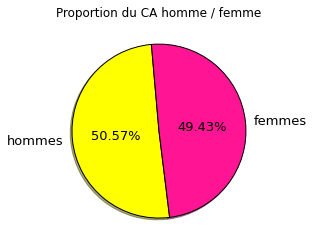

In [28]:
# création d'une liste comme arguments pour le graphique
portion = [homme_prop_ca,femme_prop_ca] 
# Paramétrage du graphique
plt.pie(portion,labels=['hommes', 'femmes'],colors = ['yellow','deeppink'],autopct='%.2f%%',pctdistance=0.5,shadow=True,startangle=95,wedgeprops={'linewidth': 1.0,'edgecolor':'black'},textprops={'fontsize': 13})
# Ajout du titre
plt.title("Proportion du CA homme / femme")
# Affichage
plt.show()

In [29]:
homme_categ = pd.pivot_table(homme, index = ['année','mois'], columns = 'categ', values = 'price',aggfunc={'price':'sum'});
femme_categ = pd.pivot_table(femme, index = ['année','mois'], columns = 'categ', values = 'price',aggfunc={'price':'sum'});

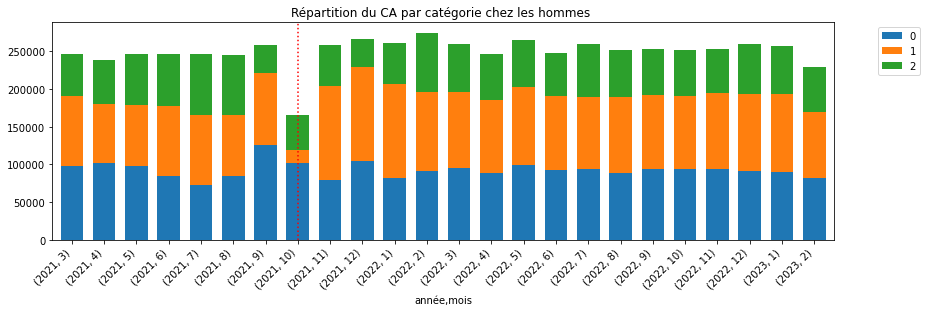

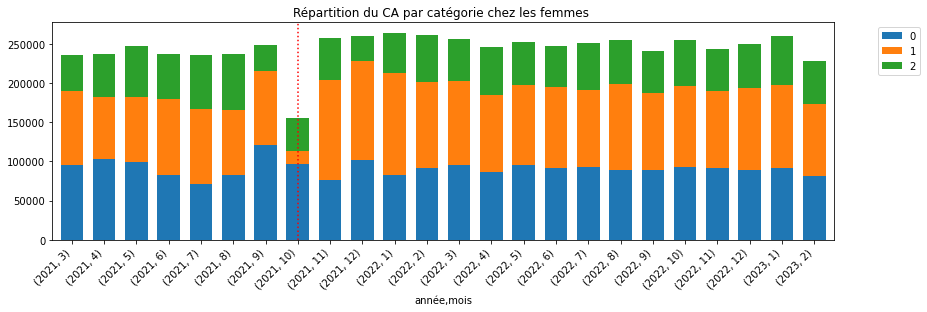

In [30]:
homme_categ.plot(kind='bar',stacked = True,figsize=(14,4),width = 0.7)
plt.title('Répartition du CA par catégorie chez les hommes ')
plt.axvline(7,color='red',linestyle=':')
plt.xticks(rotation = 45,ha='right')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()
femme_categ.plot(kind='bar',stacked = True,figsize=(14,4),width = 0.7)
plt.title('Répartition du CA par catégorie chez les femmes ')
plt.axvline(7,color='red',linestyle=':')
plt.xticks(rotation = 45,ha='right')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

Répartition semblable du CA par catégorie de produits entre les hommes et les femmes.

## Répartition du CA par âge :<a class="anchor" id="chapter3"></a>

In [31]:
cum = df.âge.cumsum()

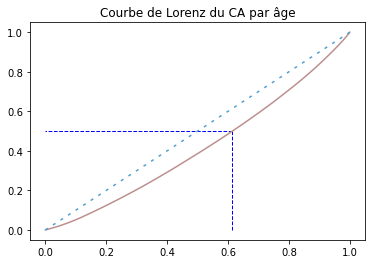

indice de gini: 0.17


In [32]:
dep = df['âge']
n = len(cum)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

medial = lorenz[(lorenz < 0.5)].size / lorenz.size # Calcul de l'intersection

plt.plot(np.linspace(0,1,len(lorenz)), lorenz, drawstyle='steps-post', color='rosybrown', label='Lorenz')
plt.plot(np.linspace(0,1,len(lorenz)), np.linspace(0,1,len(lorenz)), dashes=[2,4], color='#539ecd')

plt.vlines(medial, ymin=0, ymax=.5, color='blue', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=medial, xmax=0, y=.5, color='blue', linestyle='--', linewidth=1)
plt.title('Courbe de Lorenz du CA par âge')
plt.show()

aire_ss_courbe = lorenz[:-1].sum() / len(lorenz)
S = 0.5 - aire_ss_courbe
gini = 2*S
print(f'indice de gini: {gini:.2f}')

L'indice de gini nous indique une répartition égalitaire des clients par âge.

In [33]:
df_age = df.groupby('âge_tranche').agg({'client_id':'count', 'price' : 'sum'})

In [34]:
df_age = df_age.reset_index()

In [35]:
df_age_client = df_age[['âge_tranche','client_id']]

In [36]:
df_age_client

,âge_tranche,client_id
0,19-24,43015
1,25-29,26473
2,30-35,86443
3,36-40,99554
4,41-45,135985
5,46-51,107586
6,52-56,59914
7,57-61,36333
8,62-67,35325
9,68-72,20590


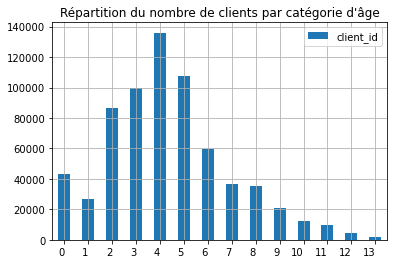

In [37]:
df_age_client.plot(kind='bar',)
plt.xticks(rotation =0,ha='right')
plt.title('Répartition du nombre de clients par catégorie d\'âge')
plt.grid()
plt.show()

In [38]:
df_age_ca = df_age[['âge_tranche','price']]

In [39]:
df_age_ca = df_age.groupby('âge_tranche').agg({'price' : 'sum'})

In [40]:
df_age_ca

,price
âge_tranche,
19-24,1804443.19
25-29,1080273.81
30-35,1419806.16
36-40,1313038.14
41-45,1795016.08
46-51,1420959.04
52-56,1004052.87
57-61,610242.08
62-67,595528.73


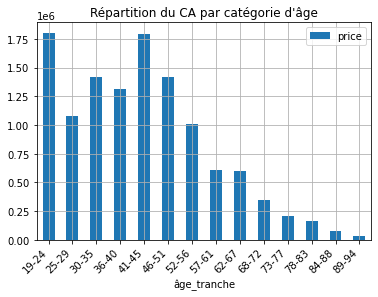

In [41]:
df_age_ca.plot(kind='bar',)
plt.xticks(rotation =45,ha='right')
plt.title('Répartition du CA par catégorie d\'âge')
plt.grid()
plt.show()

## Catégories de produits<a class="anchor" id="chapter4"></a>

In [42]:
# Je crée une table pivot pour pouvoir représenter le CA par catégorie de produit par année et mois.
df_categ = pd.pivot_table(df, index = ['année','mois'], columns = 'categ', values = 'price',aggfunc={'price':'sum'});

In [43]:
df_categ.sum()

categ
0    4422080.20
1    4653722.69
2    2780275.02
dtype: float64

Comme nous avons pu le voir lors du nettoyage des fichiers, il existe 3 catégories de produits (Catégorie 0, Catégorie 1 et Catégorie 2).  
Je vais commencer par vérifier si les produits de ces catégories ont la même échelle de prix.

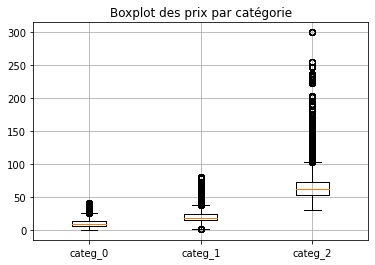

In [44]:
categ_0 = df[df['categ']==0]['price']
categ_1 = df[df['categ']==1]['price']
categ_2 = df[df['categ']==2]['price']
columns = [categ_0,categ_1,categ_2]
fig, ax = plt.subplots()
ax.boxplot(columns)
plt.xticks([1, 2, 3], ["categ_0", "categ_1", "categ_2"])
plt.title('Boxplot des prix par catégorie')
plt.grid()
plt.show()

In [45]:
df.groupby('categ').agg({'price': ['min','max','mean','std','median']})

price                                     
         min     max       mean        std median
categ                                            
0       0.62   40.99  10.638184   4.932216   9.99
1       2.00   80.99  20.485730   7.584894  19.08
2      30.99  300.00  76.207412  39.749015  62.83

In [46]:
# Je classe mes categories en demandant une liste de valeurs uniques de la colonne price
categ_0_prix = sorted(df.loc[df['categ']==0].price.unique());
categ_1_prix = sorted(df.loc[df['categ']==1].price.unique());
categ_2_prix = sorted(df.loc[df['categ']==2].price.unique());

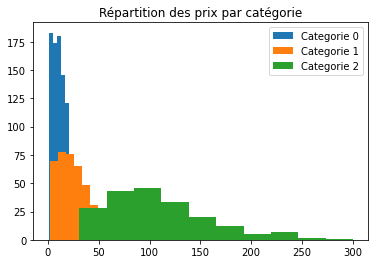

In [47]:
fig, ax = plt.subplots()

ax.hist(categ_0_prix)
ax.hist(categ_1_prix)
ax.hist(categ_2_prix)

plt.legend(['Categorie 0','Categorie 1','Categorie 2'])
plt.title('Répartition des prix par catégorie')
plt.show()

Il s'agit vraisemblablement de 3 catégories de produits de gammes différentes (Catégorie 0 étant la plus abordable et la catégorie 2 étant la plus haute gamme)

## Evolution du chiffre d'affaires<a class="anchor" id="chapter5"></a>

Calcul de la moyenne mobile :  

Pour obtenir la moyenne mobile, je crée une nouvelle colonne 'mois_année' pour regrouper mes données par mois et année.  
Je trie cette colonne par ordre croissant puis je la définie comme index.  
Je créée une nouvelle colonne 'moy_mobile' pour ma colonne 'price' en prenant comme interval un trimestre.  
Je supprime l'index et convertie ma colonne 'mois_année' en string puis je réalise mon graphique.

In [48]:
df_moyenne = df[['date','price','categ']]

In [49]:
df_moyenne['mois_année'] = pd.to_datetime(df['date']).dt.to_period('M')

<ipython-input-49-c476349aa6dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_moyenne['mois_année'] = pd.to_datetime(df['date']).dt.to_period('M')


In [50]:
df_moyenne = df_moyenne.groupby(['mois_année','categ']).agg({'price' : 'sum'}).reset_index()

In [51]:
df_moyenne = df_moyenne.sort_values('mois_année');

df_moyenne = df_moyenne.set_index(['mois_année']);

df_moyenne['moy_mobile'] = df_moyenne['price'].rolling(3,min_periods = 1).mean();

df_moyenne.reset_index(inplace=True);
df_moyenne['mois_année']= df_moyenne['mois_année'].astype('str');

In [52]:
df_moyenne = df_moyenne.reset_index()

In [53]:
df_moyenne

,index,mois_année,categ,price,moy_mobile
0,0,2021-03,0,193724.84,193724.840000
1,1,2021-03,1,186974.17,190349.505000
2,2,2021-03,2,101837.27,160845.426667
3,3,2021-04,0,205371.28,164727.573333
4,4,2021-04,1,156138.35,154448.966667
...,...,...,...,...,...
67,67,2023-01,0,181357.47,171754.990000
68,68,2023-01,2,126153.08,172538.320000
69,69,2023-02,1,180347.24,162619.263333
70,70,2023-02,0,162531.41,156343.910000


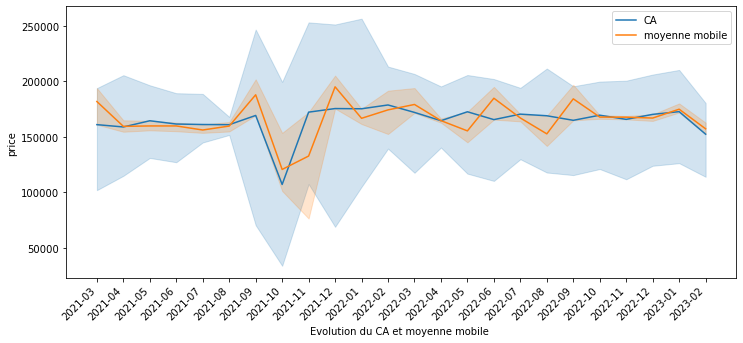

In [54]:
plt.figure( figsize = ( 12, 5)) 
  
sns.lineplot( x = 'mois_année', 
             y = df_moyenne['price'], 
             data = df_moyenne, 
             label = 'CA') 
  
sns.lineplot( x = 'mois_année', 
             y = df_moyenne['moy_mobile'], 
             data = df_moyenne, 
             label = 'moyenne mobile') 
  
plt.xlabel('Evolution du CA et moyenne mobile ') 
plt.xticks(rotation=45, ha='right')
plt.show()  

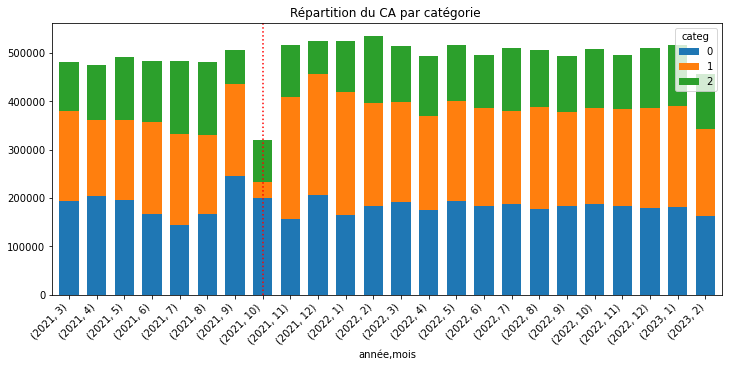

In [55]:
df_categ.plot(kind='bar',stacked = True,figsize=(12,5),width = 0.7)
plt.title('Répartition du CA par catégorie ')
plt.axvline(7,color='red',linestyle=':')
plt.xticks(rotation = 45,ha='right')
plt.show()

On remarque une grosse baisse du chiffre d'affaires entre le mois de septembre et octobre 2021.

## Baisse du mois d'octobre 2021<a class="anchor" id="chapter6"></a>

In [56]:
df_octobre_2021 = df.loc[(df['année']==2021) & (df['mois']==10),:]

In [57]:
df_octobre_2021 = pd.pivot_table(df_octobre_2021, index = ['jour'], columns = 'categ', values = 'price',aggfunc={'price':'sum'});

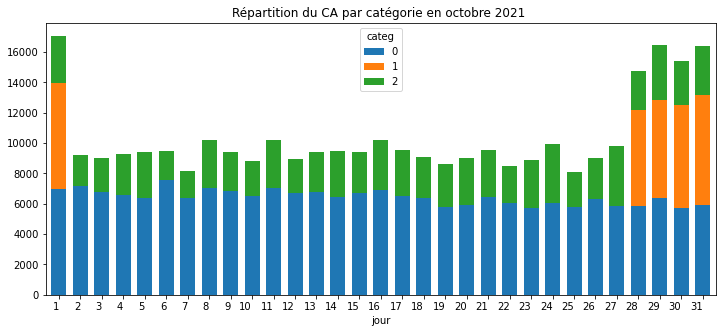

In [58]:
df_octobre_2021.plot(kind='bar',stacked = True,figsize=(12,5),width = 0.7)
plt.title('Répartition du CA par catégorie en octobre 2021 ')
plt.xticks(rotation =0,ha='right')
plt.show()

On remarque l'absence d'achat des produits de la catégorie 1 entre le 2 et le 28 octobre 2021.

In [59]:
# Aperçu du CA en chiffres
df_octobre_2021.sum()

categ
0    199325.24
1     33762.32
2     87785.59
dtype: float64

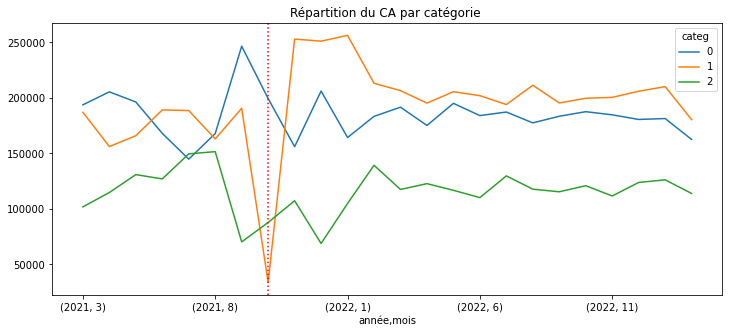

In [60]:
df_categ.plot(kind='line',figsize=(12,5))
plt.title('Répartition du CA par catégorie ')
plt.axvline(7,color='red',linestyle=':')
plt.xticks(rotation = 0)
plt.show()

## Les articles <a class="anchor" id="chapter7"></a>

La colonne id_prod regroupe l'ensemble des produits disponibles sur le site.  
Pour distinguer leur catégorie, la référence est précédée par le numéro de la catégorie.  
Exemple : 0_525 est un produit de la catégorie 0

In [61]:
df.id_prod.count()

679332

La boutique compte 679 332 articles

In [62]:
df.groupby('categ').id_prod.count()

categ
0    415680
1    227169
2     36483
Name: id_prod, dtype: int64

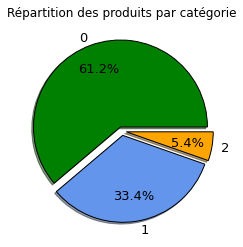

In [63]:
plt.pie(df.groupby('categ').id_prod.count(),labels=['0', '1', '2'],colors = ['green','cornflowerblue','orange'],\
        autopct='%1.1f%%',pctdistance=0.71,shadow=True, startangle=360,wedgeprops={'linewidth': 1,'edgecolor':'black'},\
        explode=(0.05, 0.05,0.05),textprops={'fontsize': 13})
#plt.axis('equal')
plt.title('Répartition des produits par catégorie')
plt.show()

Il n'y a pas la même quantité de produits par catégorie.

## Top et flop<a class="anchor" id="chapter8"></a>

In [64]:
df_id_prod = df.groupby(['categ','id_prod']).agg({'price':['sum','count']})

In [65]:
df_id_prod 

price      
                    sum count
categ id_prod                
0     0_0       4657.50  1242
      0_1       5352.13   487
      0_10       394.90    22
      0_100       61.80     3
      0_1000    2954.88   432
...                 ...   ...
2     2_95       395.96     4
      2_96     28650.18   598
      2_97      2092.87    13
      2_98       149.74     1
      2_99       594.93     7

[3266 rows x 2 columns]

In [66]:
df_id_prod = df_id_prod.reset_index()

In [67]:
categ_id_0 = df_id_prod.loc[df_id_prod['categ']==0,:];
categ_id_0 = categ_id_0.sort_values(('price','count'), ascending = False);
categ_id_0

categ id_prod     price      
                         sum count
466      0  0_1422  14741.72  1292
476      0  0_1431  14089.18  1282
469      0  0_1425  16445.34  1266
477      0  0_1432  19261.44  1254
454      0  0_1411  11201.54  1246
...    ...     ...       ...   ...
1793     0   0_549      2.99     1
752      0  0_1683      2.99     1
313      0  0_1284      1.38     1
549      0  0_1498      2.48     1
166      0  0_1151      2.99     1

[2293 rows x 4 columns]

L'article 0_1422 est l'article le plus vendus de la catégorie 0.

In [68]:
categ_id_0 = categ_id_0.sort_values(('price','sum'), ascending = False);
categ_id_0

categ id_prod     price      
                         sum count
487      0  0_1441  23452.65  1235
465      0  0_1421  23008.49  1151
457      0  0_1414  22287.00  1150
498      0  0_1451  21689.15  1085
460      0  0_1417  21372.12  1188
...    ...     ...       ...   ...
1785     0   0_541      1.99     1
2080     0   0_807      1.99     1
719      0  0_1653      1.98     2
313      0  0_1284      1.38     1
595      0  0_1539      0.99     1

[2293 rows x 4 columns]

L'article 0_1441 est l'article qui rapporte le plus dans la catégorie 0.

In [69]:
categ_id_1 = df_id_prod.loc[df_id_prod['categ']==1,:];
categ_id_1 = categ_id_1.sort_values(('price', 'count'), ascending = False);
categ_id_1

categ id_prod     price      
                         sum count
2592     1   1_369  54025.48  2252
2645     1   1_417  45947.11  2189
2642     1   1_414  51949.40  2180
2734     1   1_498  49731.36  2128
2654     1   1_425  35611.04  2096
...    ...     ...       ...   ...
2635     1   1_408    105.72     3
2636     1   1_409    167.97     3
2629     1   1_402     69.04     2
2649     1   1_420     14.24     2
2753     1   1_514    135.32     2

[737 rows x 4 columns]

L'article 1_3692 est l'article le plus vendus de la catégorie 1.

In [70]:
categ_id_1 = categ_id_1.sort_values(('price','sum'), ascending = False);
categ_id_1

categ id_prod     price      
                         sum count
2620     1   1_395  54356.25  1875
2592     1   1_369  54025.48  2252
2642     1   1_414  51949.40  2180
2608     1   1_383  51486.24  1776
2734     1   1_498  49731.36  2128
...    ...     ...       ...   ...
2631     1   1_404     29.55     3
2707     1   1_473     26.91     9
2704     1   1_470     21.64     4
2432     1   1_224     19.80     4
2649     1   1_420     14.24     2

[737 rows x 4 columns]

L'article 1_395 est l'article qui rapporte le plus dans la catégorie 1.

In [71]:
categ_id_2 = df_id_prod.loc[df_id_prod['categ']==2,:];
categ_id_2 = categ_id_2.sort_values(('price', 'count'), ascending = False);
categ_id_2

categ id_prod     price      
                         sum count
3035     2   2_102  60736.78  1027
3071     2   2_135  69334.95  1005
3046     2   2_112  65407.76   968
3202     2    2_39  53060.85   915
3200     2    2_37  43209.18   882
...    ...     ...       ...   ...
3259     2    2_93    157.98     2
3243     2    2_77    291.98     2
3248     2    2_81     86.99     1
3176     2    2_23    115.99     1
3264     2    2_98    149.74     1

[236 rows x 4 columns]

L'article 2_102 est l'article le plus vendus de la catégorie 2.

In [72]:
categ_id_2 = categ_id_2.sort_values(('price','sum'), ascending = False);
categ_id_2

categ id_prod     price      
                         sum count
3097     2   2_159  94893.50   650
3071     2   2_135  69334.95  1005
3046     2   2_112  65407.76   968
3035     2   2_102  60736.78  1027
3153     2   2_209  56971.86   814
...    ...     ...       ...   ...
3040     2   2_107    203.94     6
3259     2    2_93    157.98     2
3264     2    2_98    149.74     1
3176     2    2_23    115.99     1
3248     2    2_81     86.99     1

[236 rows x 4 columns]

L'article 2_159 est l'article qui rapporte le plus dans la catégorie 2.

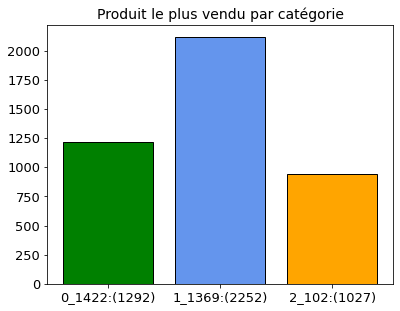

In [73]:
fig = plt.figure()
ax = fig.add_axes([0.4,0.7,0.8,0.9])
produit = ['0_1422:(1292)','1_1369:(2252)','2_102:(1027)']
nombre_ventes = [1217, 2119,941]
plt.bar(produit,nombre_ventes,color = ('green','cornflowerblue','orange'),edgecolor='black')
plt.yticks(fontsize=13, color='black')
plt.xticks(fontsize=13, color='black')
plt.title('Produit le plus vendu par catégorie', fontsize= 14)
plt.show()

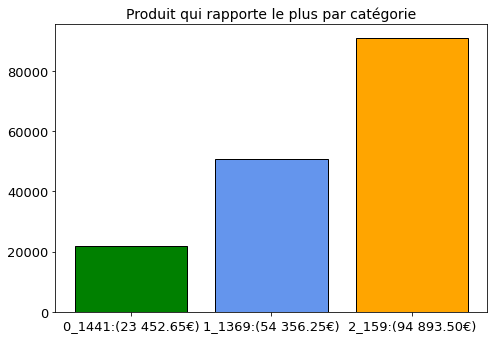

In [94]:
fig = plt.figure()
ax = fig.add_axes([0.5,0.8,1,1])
produit = ['0_1441:(23 452.65€)','1_1369:(54 356.25€)','2_159:(94 893.50€)']
nombre_ventes = [21989, 50834.81,91097.76]
plt.bar(produit,nombre_ventes,color = ('green','cornflowerblue','orange'),edgecolor='black')
plt.yticks(fontsize=13, color='black')
plt.xticks(fontsize=13, color='black')
plt.title('Produit qui rapporte le plus par catégorie', fontsize= 14)
plt.show()

Je regarde à présent les produits les moins vendus.

In [75]:
categ_id_0.sort_values([('price', 'count')], ascending= True).reset_index()

index categ id_prod     price      
                               sum count
0      595     0  0_1539      0.99     1
1     1327     0  0_2201     20.99     1
2      313     0  0_1284      1.38     1
3     1793     0   0_549      2.99     1
4      417     0  0_1379      2.99     1
...    ...   ...     ...       ...   ...
2288   454     0  0_1411  11201.54  1246
2289   477     0  0_1432  19261.44  1254
2290   469     0  0_1425  16445.34  1266
2291   476     0  0_1431  14089.18  1282
2292   466     0  0_1422  14741.72  1292

[2293 rows x 5 columns]

In [76]:
id_0_flop = categ_id_0.loc[categ_id_0[('price', 'count')]<2,:]

In [77]:
id_0_flop

categ id_prod  price      
                      sum count
698      0  0_1633  24.99     1
2167     0   0_886  21.82     1
1327     0  0_2201  20.99     1
1793     0   0_549   2.99     1
417      0  0_1379   2.99     1
752      0  0_1683   2.99     1
2109     0   0_833   2.99     1
166      0  0_1151   2.99     1
549      0  0_1498   2.48     1
802      0  0_1728   2.27     1
665      0  0_1601   1.99     1
1785     0   0_541   1.99     1
2080     0   0_807   1.99     1
313      0  0_1284   1.38     1
595      0  0_1539   0.99     1

In [78]:
categ_id_1.sort_values([('price', 'count')], ascending= True).reset_index();
id_1_flop = categ_id_1.loc[categ_id_1[('price', 'count')]<3,:];
id_1_flop

categ id_prod   price      
                       sum count
2753     1   1_514  135.32     2
2629     1   1_402   69.04     2
2649     1   1_420   14.24     2

In [79]:
categ_id_2.sort_values([('price', 'count')], ascending= True).reset_index();
id_2_flop = categ_id_2.loc[categ_id_2[('price', 'count')]<2,:];
id_2_flop

categ id_prod   price      
                       sum count
3264     2    2_98  149.74     1
3176     2    2_23  115.99     1
3248     2    2_81   86.99     1

## Panier moyen <a class="anchor" id="chapter9"></a>

In [80]:
panier_moyen = df.groupby(['session_id'])["price"].sum().mean();
print(panier_moyen)

34.634993821545265


## Les sessions<a class="anchor" id="chapter10"></a>

In [81]:
#Calcul du nombre de sessions
df.session_id.value_counts().shape

(342315,)

In [82]:
# Calcul du nombre de sessions en moyenne
df['session_id'].count()/ df['client_id'].value_counts().count()

78.99209302325582

In [83]:
df.session_id.describe(include = 'all')

count       679332
unique      342315
top       s_118668
freq            14
Name: session_id, dtype: object

In [84]:
# Je crée une nouvelle dataframe en utilisant la fonction groupby pour afficher le nombre d'articles vendus ainsi que le CA généré
df_session = df.groupby(['session_id']).agg({'price':['sum', 'count']})

In [85]:
df_session

price      
              sum count
session_id             
s_1         11.99     1
s_10        26.99     1
s_100       33.72     2
s_1000      39.22     4
s_10000     41.49     3
...           ...   ...
s_99994     28.92     3
s_99995     19.84     1
s_99996     56.27     4
s_99997      6.99     1
s_99998     35.11     3

[342315 rows x 2 columns]

In [86]:
# Je trie ma dataframe avec ma colonne ('price','sum') par ordre décroissant
df_session.sort_values(('price','sum'), ascending= False)

price      
               sum count
session_id              
s_95844     568.88     5
s_123227    539.23     3
s_335005    535.17     3
s_83158     535.17     3
s_150439    496.22     4
...            ...   ...
s_34456       0.62     1
s_107417      0.62     1
s_41352       0.62     1
s_104606      0.62     1
s_260416      0.62     1

[342315 rows x 2 columns]

In [87]:
# Je vérifie la cohérance de mon tableau en créant une dataframe de la session_id 's_95844'
s_95844 = df.loc[df['session_id']=='s_95844',:]

In [88]:
s_95844

,id_prod,date,session_id,client_id,price,categ,sex,birth,année,mois,jour,âge,âge_tranche
620824,0_525,2021-09-26 13:45:12.528595,s_95844,c_6431,2.99,0,m,1998,2021,9,26,25,25-29
620832,2_141,2021-09-26 13:45:09.528595,s_95844,c_6431,158.99,2,m,1998,2021,9,26,25,25-29
620845,2_136,2021-09-26 13:43:27.278737,s_95844,c_6431,103.92,2,m,1998,2021,9,26,25,25-29
620855,2_159,2021-09-26 13:45:11.528595,s_95844,c_6431,145.99,2,m,1998,2021,9,26,25,25-29
620861,2_151,2021-09-26 13:43:53.402502,s_95844,c_6431,156.99,2,m,1998,2021,9,26,25,25-29


La session_id qui a généré le plus gros CA est la session 's_95844' pour l'achat de 4 produits de catégorie 2 et un produit de catégorie 0 pour un montant de 568.88€

In [89]:
df_session.sort_values(('price','sum'), ascending= True)

price      
               sum count
session_id              
s_260416      0.62     1
s_104606      0.62     1
s_41352       0.62     1
s_34456       0.62     1
s_107417      0.62     1
...            ...   ...
s_150439    496.22     4
s_335005    535.17     3
s_83158     535.17     3
s_123227    539.23     3
s_95844     568.88     5

[342315 rows x 2 columns]

In [90]:
df_session_flop = df_session.loc[df_session[('price', 'count')]<2,:].reset_index();
print(df_session_flop)

       session_id  price      
                     sum count
0             s_1  11.99     1
1            s_10  26.99     1
2        s_100000  10.00     1
3        s_100004   9.92     1
4        s_100005   4.99     1
...           ...    ...   ...
163345    s_99991  19.99     1
163346    s_99992   7.99     1
163347    s_99993   8.58     1
163348    s_99995  19.84     1
163349    s_99997   6.99     1

[163350 rows x 3 columns]


In [91]:
df_session_flop.session_id.count() / df.session_id.count() * 100

24.045680168165198

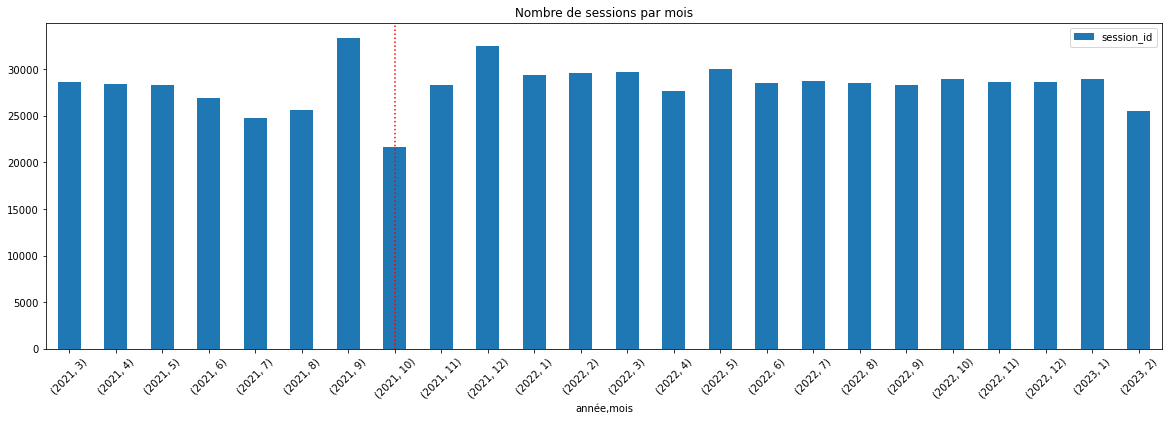

In [92]:
df.groupby(['année','mois']).agg({'session_id': 'count'}).plot(kind='bar',figsize=(20,6))
plt.xticks(rotation=45)
plt.title('Nombre de sessions par mois')
plt.axvline(7,color='red',linestyle=':')
plt.show()